

Flight Delays and Cancellations – Exploratory Data Analysis

This notebook begins the analysis of flight data from 2024. We'll explore the structure of the dataset, clean missing or inconsistent values, and generate initial visualizations to understand flight patterns, delays, and cancellations.

### Goals:
- Load and inspect the dataset
- Identify missing values and data types
- Clean and preprocess the data
- Visualize basic distributions and patterns


### Loading the dataset
Imported the flight data from a CSV file and display the first few rows. This helps verify that the dataset loads correctly and gives us a quick look at its structure.


In [6]:

import pandas as pd

# Load the dataset
df = pd.read_csv("flight_data_2024.csv")  

# Show the first 5 rows
df.head()

,year,month,day_of_month,day_of_week,fl_date,origin,origin_city_name,origin_state_nm,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,cancelled,air_time,distance,weather_delay,late_aircraft_delay
0,2024,1,1,1,1/1/2024,JFK,"New York, NY",New York,1247.0,31.0,1318.0,1442.0,7.0,0,84.0,509,0,0
1,2024,1,1,1,1/1/2024,MSP,"Minneapolis, MN",Minnesota,1001.0,20.0,1021.0,1249.0,6.0,0,88.0,622,0,0
2,2024,1,1,1,1/1/2024,JFK,"New York, NY",New York,1411.0,21.0,1432.0,1533.0,8.0,0,61.0,288,0,0
3,2024,1,1,1,1/1/2024,RIC,"Richmond, VA",Virginia,1643.0,13.0,1656.0,1747.0,12.0,0,51.0,288,0,0
4,2024,1,1,1,1/1/2024,DTW,"Detroit, MI",Michigan,1010.0,21.0,1031.0,1016.0,4.0,0,45.0,237,0,0


### Dataset structure and data types
We use df.info() to examine the number of entries, column names, data types, and missing values. This helps us identify which columns may need cleaning or type conversion.


In [7]:
# Overview of columns, data types, and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   year                 1048575 non-null  int64  
 1   month                1048575 non-null  int64  
 2   day_of_month         1048575 non-null  int64  
 3   day_of_week          1048575 non-null  int64  
 4   fl_date              1048575 non-null  object 
 5   origin               1048575 non-null  object 
 6   origin_city_name     1048575 non-null  object 
 7   origin_state_nm      1048575 non-null  object 
 8   dep_time             1026022 non-null  float64
 9   taxi_out             1025450 non-null  float64
 10  wheels_off           1025450 non-null  float64
 11  wheels_on            1024898 non-null  float64
 12  taxi_in              1024898 non-null  float64
 13  cancelled            1048575 non-null  int64  
 14  air_time             1022824 non-null  float64
 15

### Summary statistics
df.describe() provides basic statistics for numerical columns, including mean, standard deviation, and percentiles. This helps us understand the distribution and scale of delay-related metrics.


In [8]:
# Summary statistics for numerical columns
df.describe()



,year,month,day_of_month,day_of_week,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,cancelled,air_time,distance,weather_delay,late_aircraft_delay
count,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.026022e+06,1.025450e+06,1.025450e+06,1.024898e+06,1.024898e+06,1.048575e+06,1.022824e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2024.0,1.478081e+00,1.530512e+01,3.893483e+00,1.325074e+03,1.825012e+01,1.349996e+03,1.476156e+03,8.082517e+00,2.222635e-02,1.162270e+02,8.345389e+02,1.194321e+00,5.326660e+00
std,0.0,4.995196e-01,8.585503e+00,2.010038e+00,4.972990e+02,1.044025e+01,4.980426e+02,5.198682e+02,6.512591e+00,1.474190e-01,7.091204e+01,5.923104e+02,2.005819e+01,2.975676e+01
min,2024.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,8.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00
25%,2024.0,1.000000e+00,8.000000e+00,2.000000e+00,9.110000e+02,1.200000e+01,9.290000e+02,1.058000e+03,4.000000e+00,0.000000e+00,6.400000e+01,4.020000e+02,0.000000e+00,0.000000e+00
50%,2024.0,1.000000e+00,1.500000e+01,4.000000e+00,1.323000e+03,1.500000e+01,1.337000e+03,1.510000e+03,6.000000e+00,0.000000e+00,1.000000e+02,6.920000e+02,0.000000e+00,0.000000e+00
75%,2024.0,2.000000e+00,2.300000e+01,6.000000e+00,1.736000e+03,2.100000e+01,1.750000e+03,1.914000e+03,9.000000e+00,0.000000e+00,1.470000e+02,1.069000e+03,0.000000e+00,0.000000e+00
max,2024.0,2.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.130000e+02,2.400000e+03,2.400000e+03,4.440000e+02,1.000000e+00,7.230000e+02,5.095000e+03,1.804000e+03,2.100000e+03


### Missing values per column
We count the number of missing values in each column to identify which features need cleaning or imputation.


In [9]:
# Count missing values per column
df.isnull().sum()



year                       0
month                      0
day_of_month               0
day_of_week                0
fl_date                    0
origin                     0
origin_city_name           0
origin_state_nm            0
dep_time               22553
taxi_out               23125
wheels_off             23125
wheels_on              23677
taxi_in                23677
cancelled                  0
air_time               25751
distance                   0
weather_delay              0
late_aircraft_delay        0
dtype: int64

This output shows how many missing values exist in each column. We’ll use this to decide whether to drop, impute, or otherwise handle missing data in the next step.


In [10]:
# Drop rows with missing values (if minimal)
df_cleaned = df.dropna()

# OR: Fill missing values with 0 (if appropriate for delay counts)
# df_cleaned = df.fillna(0)

# Check shape after cleaning
df_cleaned.shape


(1022824, 18)

We handle missing values by either dropping rows with nulls or filling them with zeros, depending on the context. For delay-related columns, filling with zero may be appropriate since a missing value could imply no delay was recorded.


In [11]:
# Check for duplicate rows
df_cleaned.duplicated().sum()


0

In [23]:
# Convert flight date to datetime
df_cleaned.loc[:, 'fl_date'] = pd.to_datetime(df_cleaned['fl_date'], errors='coerce')



We convert `fl_date` to a datetime object to enable time-based analysis, such as trends by month or weekday. This supports temporal visualizations and modeling later in the project.


In [20]:
df_cleaned.loc[:, 'dep_hour'] = pd.to_datetime(df_cleaned['dep_time'], format='%H:%M:%S', errors='coerce').dt.hour



### Extracting Departure Hour

To support time-of-day analysis in Notebook 02, we created a new column `dep_hour` by extracting the hour from the `dep_time` field. This allows us to group and compare delays based on the hour of departure.

We used the following code:
```python
df_cleaned.loc[:, 'dep_hour'] = pd.to_datetime(df_cleaned['dep_time'], format='%H:%M:%S', errors='coerce').dt.hour


### Visualizing Statistical Concepts

To support Objective 1.1 from the assessment criteria, we visualize key statistical measures — mean, median, and standard deviation — using the `weather_delay` column.

These charts help us understand the distribution and spread of delay times, and reinforce the importance of descriptive statistics in exploratory data analysis.

- The histogram shows how most flights experience minimal weather delay, with a few extreme outliers.
- The bar chart summarizes the central tendency and variability of weather delays.



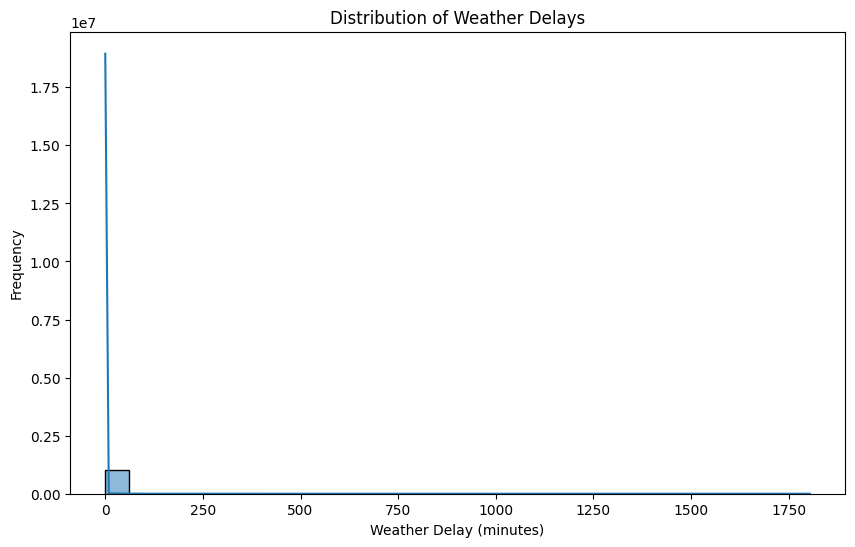

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of weather delays
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['weather_delay'], bins=30, kde=True)
plt.title('Distribution of Weather Delays')
plt.xlabel('Weather Delay (minutes)')
plt.ylabel('Frequency')
plt.show()


This histogram shows the distribution of weather-related delays. Most flights experience minimal delays, but there are noticeable outliers with longer delays. This supports our hypothesis testing in Notebook 02.


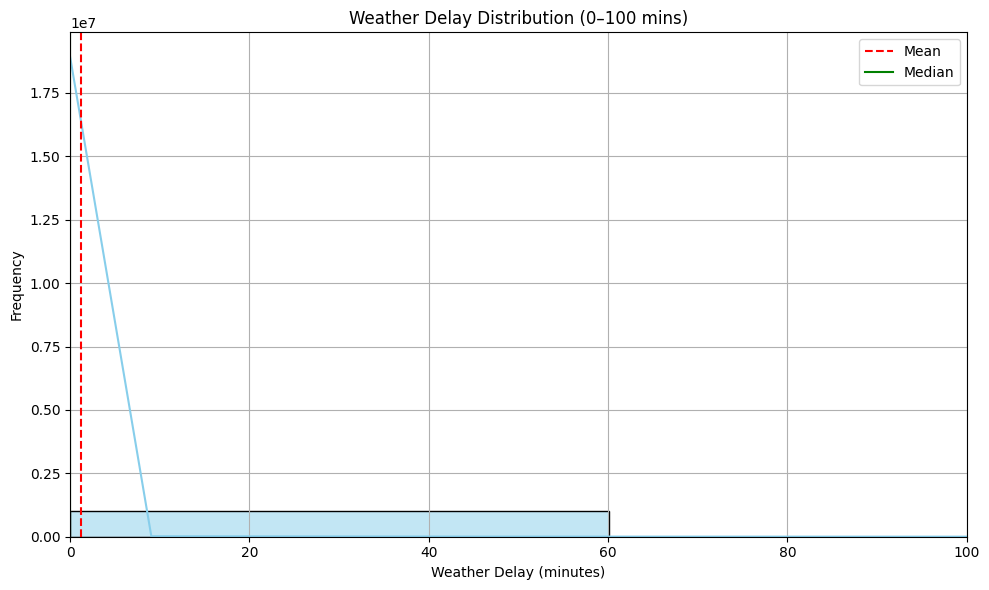

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['weather_delay'], bins=30, kde=True, color='skyblue')
plt.xlim(0, 100)  # Limit to typical delay range
plt.axvline(df_cleaned['weather_delay'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df_cleaned['weather_delay'].median(), color='green', linestyle='-', label='Median')
plt.title('Weather Delay Distribution (0–100 mins)')
plt.xlabel('Weather Delay (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



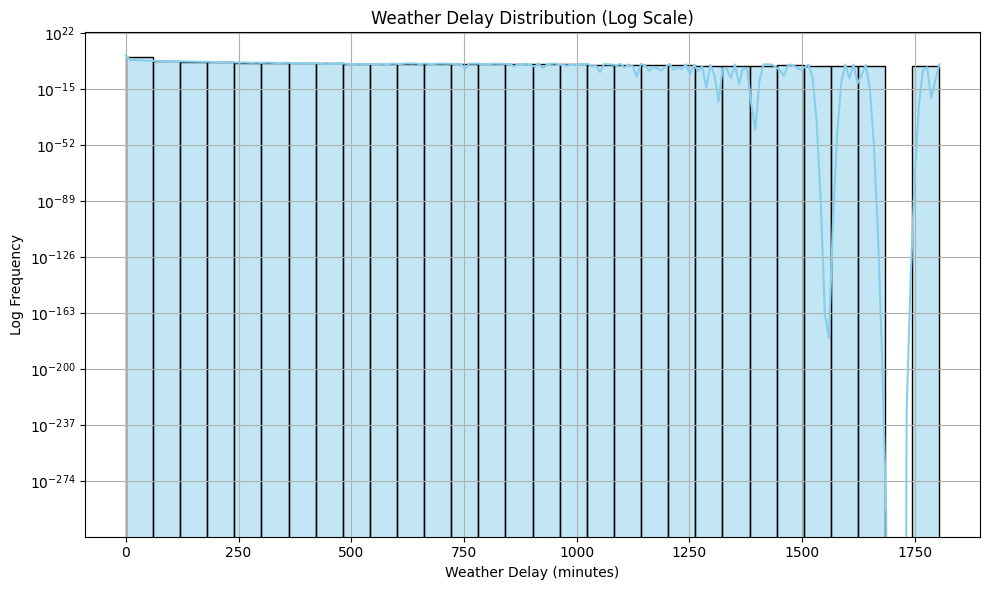

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['weather_delay'], bins=30, kde=True, color='skyblue')
plt.yscale('log')  # Compress tall spikes
plt.title('Weather Delay Distribution (Log Scale)')
plt.xlabel('Weather Delay (minutes)')
plt.ylabel('Log Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
df_cleaned['weather_delay'].describe()


count    1.022824e+06
mean     1.224390e+00
std      2.030821e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.804000e+03
Name: weather_delay, dtype: float64

###  Core Statistical Concepts

This project uses key statistical principles to explore flight delays:

- **Mean**: The average delay time, useful for understanding central tendency.
- **Median**: The middle value, less sensitive to outliers than the mean.
- **Standard Deviation**: Measures how spread out delay times are.
- **Hypothesis Testing**: Used in Notebook 02 to test assumptions about delay patterns.
- **Probability**: Helps interpret the likelihood of delays under certain conditions.

These concepts guide our analysis and help uncover patterns in flight behavior.


In [18]:
df_cleaned['weather_delay'].isnull().sum()


0

### ✅ Summary

This notebook successfully loaded and cleaned the flight dataset. We handled missing values, formatted time columns, and visualized delay distributions. These steps lay the groundwork for hypothesis testing and modeling in the next stages of the project.


In [16]:
df_cleaned['dep_time'].head(10)



0    12:47:00
1    10:01:00
2    14:11:00
3    16:43:00
4    10:10:00
5    14:03:00
6    09:47:00
7    11:35:00
8    08:10:00
9    12:48:00
Name: dep_time, dtype: object

In [21]:
df_cleaned['dep_hour'].head(10)


0    12.0
1    10.0
2    14.0
3    16.0
4    10.0
5    14.0
6     9.0
7    11.0
8     8.0
9    12.0
Name: dep_hour, dtype: float64

In [22]:
df_cleaned['dep_hour'].isnull().sum()


786

In [25]:
# Export cleaned dataset for use in ML and Tableau
df_cleaned.to_csv('cleaned_flight_data.csv', index=False)
